In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

In [51]:

train_data = pd.read_csv('./train.csv')

In [52]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print(type(train_data))
train_data.shape

<class 'pandas.core.frame.DataFrame'>


(42000, 785)

In [54]:
#converting to numpy array
train_data=train_data.values
print(type(train_data))
train_data.shape

<class 'numpy.ndarray'>


(42000, 785)

In [55]:
x_train = train_data[:,1:]
y_train = train_data[:,0]


0


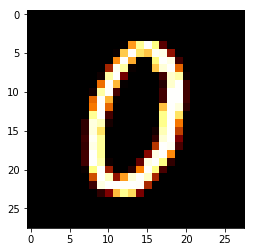

In [56]:
plt.imshow( np.reshape(x_train[5], (28,28)), cmap = 'afmhot')
plt.plot()
print(y_train[5])

In [57]:
model = Sequential()

In [58]:
model.add(Dense(100, input_shape = (784,)))
model.add(Activation ('relu'))
model.add(Dense(50))
model.add(Activation ('relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_17 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [60]:
x_train = x_train/255.0
x_train = x_train[:5000]
y_train = y_train[:5000]

In [110]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
y_train_new = np_utils.to_categorical(y_train)
y_train_new.shape

(5000, 10)

In [112]:
model.fit(x_train, y_train_new, batch_size=20, epochs=15, shuffle=True)

Epoch 1/15
5000/5000 [==============================] - 4s 830us/step - loss: 0.3726 - acc: 0.8928
Epoch 2/15
5000/5000 [==============================] - 4s 746us/step - loss: 0.3034 - acc: 0.9114
Epoch 3/15
5000/5000 [==============================] - 4s 751us/step - loss: 0.2333 - acc: 0.9328
Epoch 4/15
5000/5000 [==============================] - 4s 760us/step - loss: 0.2014 - acc: 0.9432
Epoch 5/15
5000/5000 [==============================] - 4s 745us/step - loss: 0.1580 - acc: 0.9522
Epoch 6/15
5000/5000 [==============================] - 4s 751us/step - loss: 0.1394 - acc: 0.9618
Epoch 7/15
5000/5000 [==============================] - 4s 741us/step - loss: 0.1202 - acc: 0.9646
Epoch 8/15
5000/5000 [==============================] - 4s 752us/step - loss: 0.0970 - acc: 0.9714
Epoch 9/15
5000/5000 [==============================] - 4s 746us/step - loss: 0.0796 - acc: 0.9758
Epoch 10/15
5000/5000 [==============================] - 4s 758us/step - loss: 0.0763 - acc: 0.9780
Epoch 11/

In [113]:
out = model.predict( np.reshape( x_train[0], (1,784) ) )
out


array([[1.81794000e-12, 9.99992847e-01, 1.01171125e-07, 6.50533516e-10,
        3.57660412e-09, 6.37629016e-09, 2.67994871e-09, 5.42870566e-07,
        6.46305125e-06, 2.09270067e-11]], dtype=float32)

In [114]:
np.argmax(out[0])

1

In [115]:

x_test = train_data[:,1:]
y_test = train_data[:,0]
x_test = x_test[5000:12000]
y_test = y_test[5000:12000]
x_test.shape, y_test.shape

((7000, 784), (7000,))

In [116]:
def acc(outputs, Y_true):
    ans = 0.0
    for i in range(Y_true.shape[0]):
        ans += np.argmax( outputs[i] ) == Y_true[i]
    ans = ans / Y_true.shape[0]
    return ans

In [117]:
pred = model.predict(x_test)

In [118]:
print ( acc(pred, y_test) )

0.9434285714285714
